# MARKETING ANALYSIS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')
# load dataset
df = pd.read_csv(r"C:\Users\vanda\Downloads\marketing_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [224]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [239]:
# fill missing values
mean_value = df['Income'].mean()
df['Income'].fillna(mean_value, inplace=True)


In [9]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# Transform the 'Income' column to a numerical format
df['Income'] = df['Income'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)





In [10]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [228]:
#drop year birth and add age column


# Get the current year
current_year = datetime.now().year

# Calculate the current age
df['Age'] = current_year - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)


In [229]:
# Find average age of customers
average_age = df['Age'].mean()

# Print the average age result
print("The average age of customers is:", average_age)


The average age of customers is: 54.19419642857143


The range of average income is from 42247.25135379061 to 62247.25135379061


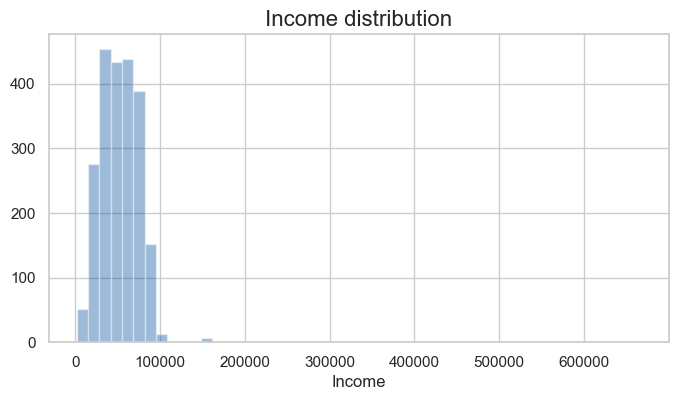

In [230]:
# draw a graph which shhow income distribution
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)

# Calculate average income
average_income = df['Income'].mean()

# Define the range of average income
income_range_min = average_income - 10000
income_range_max = average_income + 10000

# Print the range of average income
print("The range of average income is from", income_range_min, "to", income_range_max)


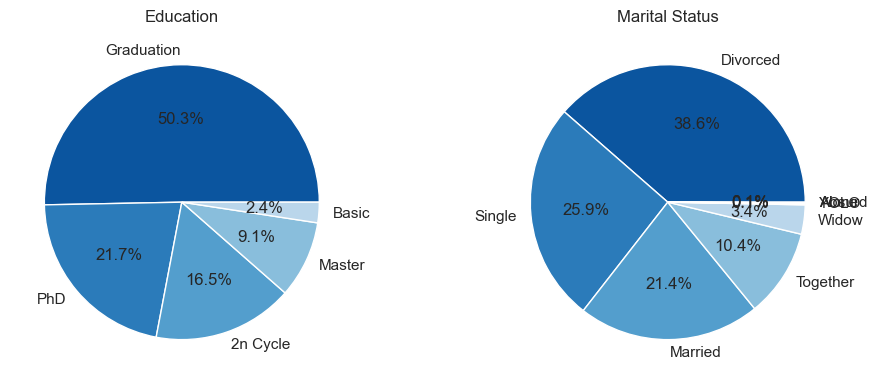

In [231]:
# show Education and Marital Status of customers

# Get the data for the two pie charts
column1_data = df['Education']
column2_data = df['Marital_Status']

# Create subplots for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


# Create the first pie chart
plt.subplot(121)
axs[0].pie(column1_data.value_counts(), labels=column1_data.unique(), autopct='%1.1f%%')
axs[0].set_title('Education')

# Create the second pie chart
plt.subplot(122)
axs[1].pie(column2_data.value_counts(), labels=column2_data.unique(), autopct='%1.1f%%')
axs[1].set_title('Marital Status')
 
plt.tight_layout()
plt.show()


In [232]:
df['Children_home'] = df['kidhome']= df['Teenhome']

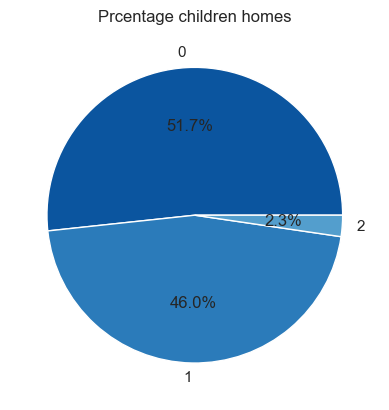

In [233]:
# percentage children homes
Children_home = df['Children_home'].value_counts()
plt.pie(df['Children_home'].value_counts(),labels=df['Children_home'].unique(),autopct='%1.1f%%')
plt.title('Prcentage children homes')
plt.show()

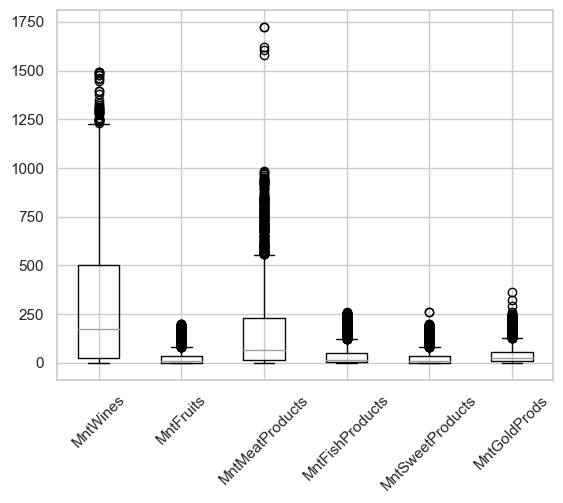

In [234]:
# amount of products which was comsumed
products = df.boxplot(column=['MntWines','MntFruits', 'MntMeatProducts',      
                                  'MntFishProducts','MntSweetProducts', 'MntGoldProds'
                                  ], rot=45)


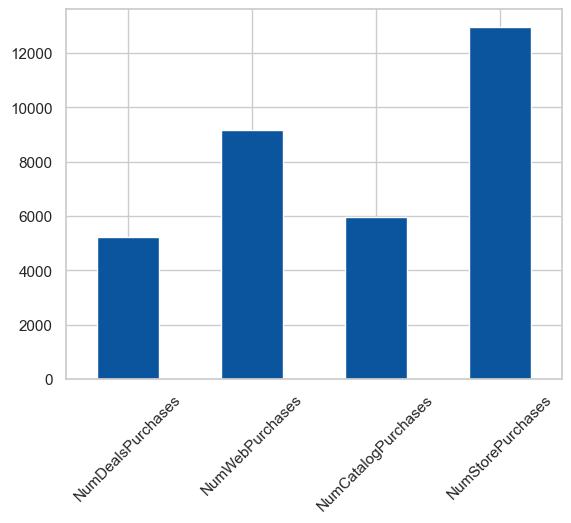

In [235]:
# method of purchase


columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']
df[columns].sum().plot.bar(rot=45)
plt.show()

                            

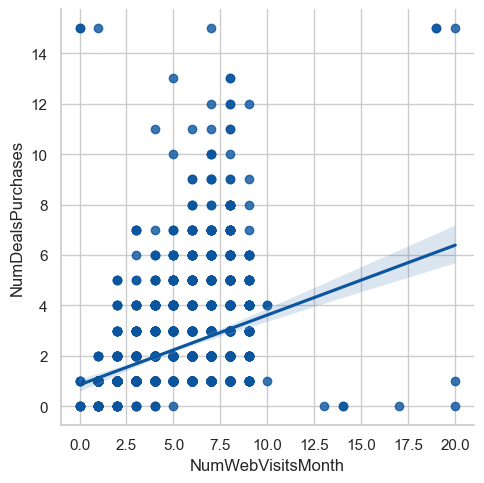

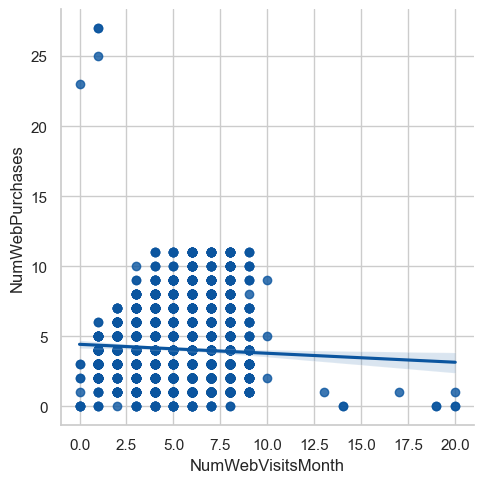

In [260]:
# Comparing effectiveness between Deal purchase and Web purchase through NumWebVisitsMonth
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);


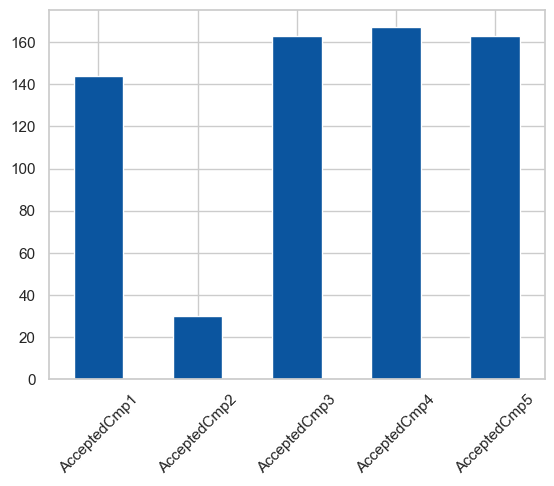

In [236]:
column =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df[column].sum().plot.bar(rot=45)
plt.show()



In [237]:
df['totalpurchase'] = df[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases']].sum(axis=1)

                

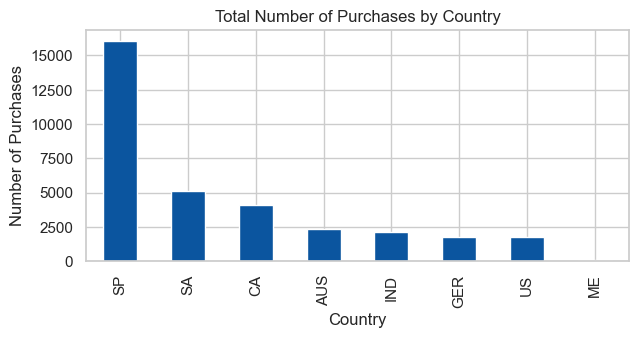

In [238]:
#the biggest consuming countries
plt.figure(figsize=(7, 3)) 
df.groupby('Country')['totalpurchase'].sum().sort_values(ascending = False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=12)
plt.ylabel('Number of Purchases');

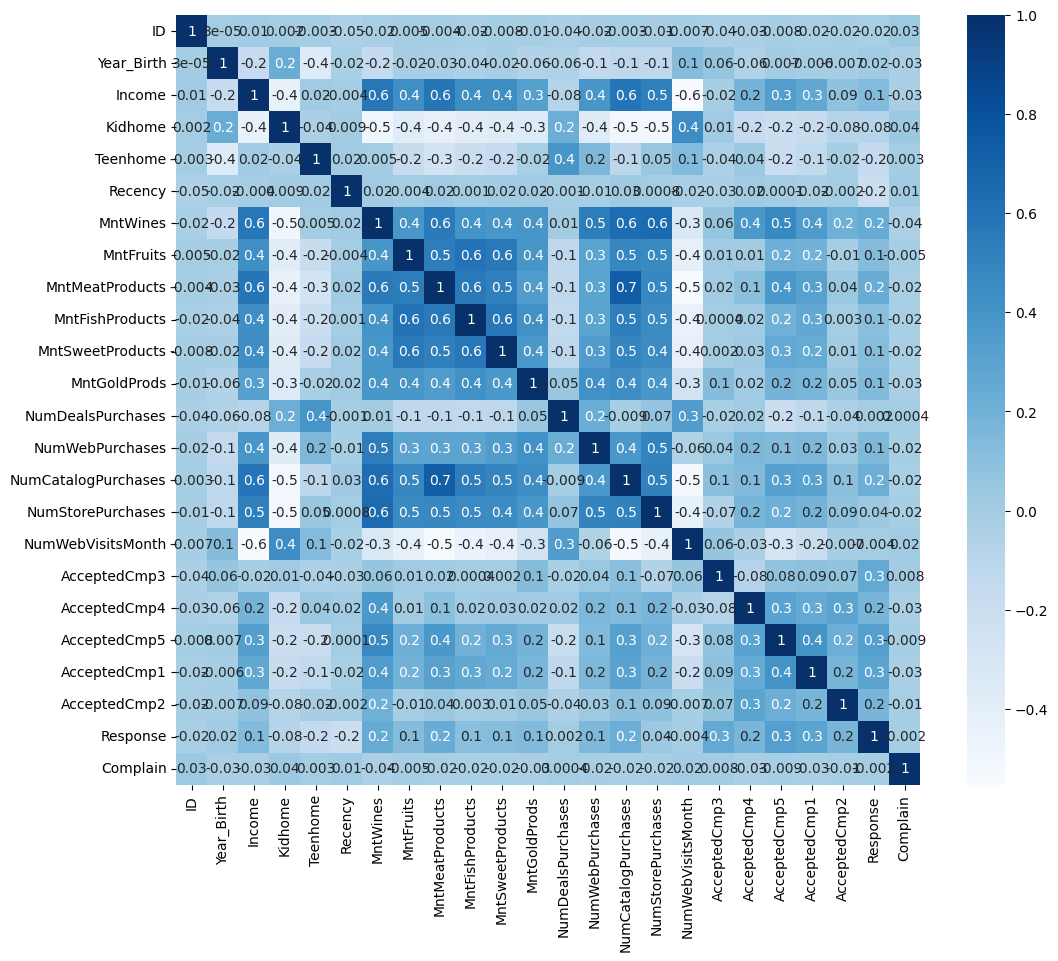

In [11]:
plt.figure(figsize=(12, 10))
corr = df.corr() 
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
plt.show()

Conclusion
-Based on what have just analyzed , I can get some useful informations from customers of this company:
+Their average income is from 42000$ to 62000$
+Most of them graduated(50,3%) and have a PhD degree(21,7%)
+There are 38,6% of customers are divorced , 25,9% are single and 21,4% are married
+Among married customers, 46% have one child, 2,3% haev 2 children and 51,7% don't have any child yet.
+The biggest consuming products are Wines and Meat
+They mostly purchased in stores and through website
+Number of web visits is negatively correlated with number of web purchases.Instead, it is positively correlated with the number of deals purchased
+the 4th campain is the most successful
+Spain is the biggest market



Suggestion:


+Highlight the premium quality and variety of the company's products, focusing on wines and meats as the top-selling items.
Emphasize the superior taste, freshness, and exquisite flavors that cater to the refined palates of our target audience.

+Create an integrated shopping experience across physical stores and the company's website.
+Provide personalized recommendations based on customers' preferences and purchasing history.
+Highlight the convenience of shopping online while showcasing the ambiance and expertise available in physical stores.

+Offer special promotions, discounts, and loyalty rewards to incentivize purchases.
+Create limited-time offers and exclusive deals, targeting specific customer segments such as singles, families, and high-income individuals.

+Develop engaging and informative content related to food, wine pairings, cooking tips, and the benefits of the company's products.

+Capitalize on the success in the Spanish market and expand to other regions with similar demographics and preferences.
+Adapt the campaign to resonate with local cultures and traditions while maintaining the company's brand identity and values.